In [2]:
from google.colab import auth
auth.authenticate_user()


from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

In [125]:
공릉1동 = pd.read_csv('/content/drive/My Drive/수퍼판다/data/분석용 데이터셋/mise_card/노원_공릉1동.csv')
공릉1동.head(2)

,STD_DD,cmise_med,cmise_mode,mise_med,mise_mode,"('USE_AMT', '가구')","('USE_AMT', '가전')","('USE_AMT', '광학제품')","('USE_AMT', '레저업소')","('USE_AMT', '문화취미')","('USE_AMT', '보건위생')","('USE_AMT', '사무통신')","('USE_AMT', '서적문구')","('USE_AMT', '수리서비스')","('USE_AMT', '신변잡화')","('USE_AMT', '연료판매')","('USE_AMT', '요식업소')","('USE_AMT', '유통업')","('USE_AMT', '음료식품')","('USE_AMT', '의료기관')","('USE_AMT', '의복')","('USE_AMT', '자동차정비')","('USE_AMT', '자동차판매')","('USE_AMT', '전기')","('USE_AMT', '주방용구')","('USE_AMT', '직물')"
0,2018-04-01,24.479167,24.475394,50.520833,50.440681,0.0,0.081251,0.000608,0.005562,0.002316,0.036807,0.000213,0.000920,0.000269,0.000556,0.143718,0.433732,0.214833,0.032936,0.034716,0.009165,0.001661,0.00000,0.000000,0.000368,0.00037
1,2018-04-02,22.666667,22.446797,57.354167,57.872890,0.0,0.050835,0.000127,0.003370,0.003947,0.022294,0.037618,0.015188,0.004645,0.006201,0.114928,0.277038,0.200890,0.027139,0.195435,0.009133,0.025388,0.00168,0.000152,0.003993,0.00000


In [0]:
col = ['tm','cmise_med',	'cmise_mode',	'mise_med',	'mise_mode','가구','가전',
       '광학제품','레저업소','문화취미','보건위생', '사무통신','서적문구',
       '수리서비스','신변잡화','연료판매','요식업소','유통업','음료식품','의료기관',
      '의복','자동차정비', '자동차판매','전기','주방용구','직물']
공릉1동.columns = col

In [108]:
공릉1동.head()

,tm,cmise_med,cmise_mode,mise_med,mise_mode,가구,가전,광학제품,레저업소,문화취미,보건위생,사무통신,서적문구,수리서비스,신변잡화,연료판매,요식업소,유통업,음료식품,의료기관,의복,자동차정비,자동차판매,전기,주방용구,직물
0,2018-04-01,24.479167,24.475394,50.520833,50.440681,0.0,0.081251,0.000608,0.005562,0.002316,0.036807,0.000213,0.000920,0.000269,0.000556,0.143718,0.433732,0.214833,0.032936,0.034716,0.009165,0.001661,0.000000,0.000000,0.000368,0.000370
1,2018-04-02,22.666667,22.446797,57.354167,57.872890,0.0,0.050835,0.000127,0.003370,0.003947,0.022294,0.037618,0.015188,0.004645,0.006201,0.114928,0.277038,0.200890,0.027139,0.195435,0.009133,0.025388,0.001680,0.000152,0.003993,0.000000
2,2018-04-03,14.541667,14.447156,50.666667,51.347641,0.0,0.020815,0.000079,0.002493,0.000662,0.023592,0.000960,0.003611,0.003193,0.003466,0.115216,0.240067,0.186259,0.028361,0.278475,0.009885,0.020385,0.024117,0.006862,0.028194,0.003308
3,2018-04-04,4.520833,4.535086,9.166667,8.601024,0.0,0.034329,0.001787,0.003280,0.002845,0.028906,0.012259,0.003609,0.004901,0.006216,0.120216,0.290916,0.184492,0.026680,0.242365,0.018170,0.012684,0.000250,0.002744,0.000962,0.002388
4,2018-04-05,1.895833,2.270096,3.062500,2.995553,0.0,0.019846,0.000443,0.002761,0.001442,0.027890,0.014592,0.009105,0.004145,0.001744,0.138557,0.313486,0.176068,0.039206,0.212623,0.005474,0.022425,0.002658,0.001570,0.004992,0.000975


In [128]:
업종 = {}
for i in range(5,len(공릉1동.columns)):
  업종[공릉1동.columns[i]] = 공릉1동.iloc[:,i].sum()
  
top5 = sorted(업종, key=lambda k : 업종[k], reverse =True)[:5]
top5

['요식업소', '유통업', '의료기관', '연료판매', '가전']

In [129]:
공릉1동top = pd.concat([공릉1동.tm,공릉1동[top5]], axis=1)
공릉1동top.head()

,tm,요식업소,유통업,의료기관,연료판매,가전
0,2018-04-01,0.433732,0.214833,0.034716,0.143718,0.081251
1,2018-04-02,0.277038,0.200890,0.195435,0.114928,0.050835
2,2018-04-03,0.240067,0.186259,0.278475,0.115216,0.020815
3,2018-04-04,0.290916,0.184492,0.242365,0.120216,0.034329
4,2018-04-05,0.313486,0.176068,0.212623,0.138557,0.019846


In [0]:
from datetime import datetime

공릉1동top['tm'] = 공릉1동top.tm.apply(lambda x: str(x))
공릉1동top['tm'] = 공릉1동top.tm.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [0]:
공릉1동top = 공릉1동top.set_index('tm')
공릉1동top.head()

In [0]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False  

([<matplotlib.axis.XTick at 0x7f5558aef198>,
 <a list of 30 Text xticklabel objects>)

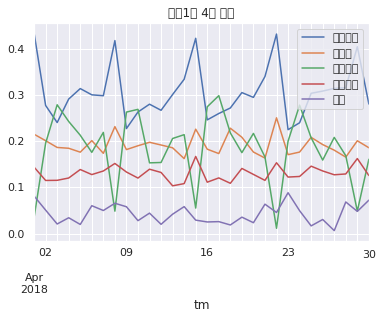

In [142]:
import matplotlib.pyplot as plt
import matplotlib


공릉1동top.loc['2018-04'].plot()
plt.title('공릉1동 4월 업종')
plt.xticks(pd.date_range(start = '20180401', end='20180430'))

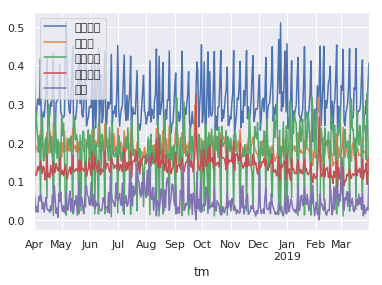

In [133]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

공릉1동top.plot()


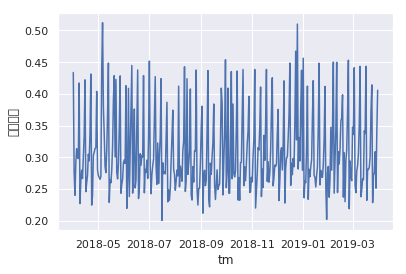

In [112]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'].insert(0, 'Malgun Gothic')

ax = sns.lineplot(x="tm", y="요식업소", data=공릉1동top)

In [116]:
data = np.random.randn(100, 4).cumsum(axis=0)
data[0]

array([-1.3456012 ,  0.99348973, -0.66583844,  1.74976729])

In [0]:
>>> import numpy as np, pandas as pd; plt.close("all")
>>> index = 공릉1동top.tm
>>> data = np.random.randn(100, 4).cumsum(axis=0)
>>> wide_df = pd.DataFrame(data, index, ["a", "b", "c", "d"])
>>> ax = sns.lineplot(data=wide_df)

In [121]:
import numpy as np, pandas as pd; plt.close("all")

공릉1동top.set_index('tm')

공릉1동top

,tm,요식업소,유통업,의료기관,연료판매,가전
0,2018-04-01,0.433732,0.214833,0.034716,0.143718,0.081251
1,2018-04-02,0.277038,0.200890,0.195435,0.114928,0.050835
2,2018-04-03,0.240067,0.186259,0.278475,0.115216,0.020815
3,2018-04-04,0.290916,0.184492,0.242365,0.120216,0.034329
4,2018-04-05,0.313486,0.176068,0.212623,0.138557,0.019846
5,2018-04-06,0.299999,0.201051,0.175644,0.127626,0.060335
6,2018-04-07,0.298017,0.173573,0.218803,0.135388,0.049974
7,2018-04-08,0.417191,0.231258,0.048546,0.151645,0.065623
8,2018-04-09,0.227066,0.181641,0.262674,0.133141,0.058105
9,2018-04-10,0.262892,0.189952,0.268627,0.120092,0.028052


In [0]:
week = pd.date_range(start = '20180401', end='20190331', freq='B')

weekend = 노원_공릉1동[~노원_공릉1동.STD_DD.isin(week)]
weekday = 노원_공릉1동[노원_공릉1동.STD_DD.isin(week)]

In [8]:
weekend.head()

,STD_DD,cmise_med,cmise_mode,mise_med,mise_mode,"('USE_AMT', '가구')","('USE_AMT', '가전')","('USE_AMT', '광학제품')","('USE_AMT', '레저업소')","('USE_AMT', '문화취미')","('USE_AMT', '보건위생')","('USE_AMT', '사무통신')","('USE_AMT', '서적문구')","('USE_AMT', '수리서비스')","('USE_AMT', '신변잡화')","('USE_AMT', '연료판매')","('USE_AMT', '요식업소')","('USE_AMT', '유통업')","('USE_AMT', '음료식품')","('USE_AMT', '의료기관')","('USE_AMT', '의복')","('USE_AMT', '자동차정비')","('USE_AMT', '자동차판매')","('USE_AMT', '전기')","('USE_AMT', '주방용구')","('USE_AMT', '직물')"
0,2018-04-01,24.479167,24.475394,50.520833,50.440681,0.000000,0.081251,0.000608,0.005562,0.002316,0.036807,0.000213,0.000920,0.000269,0.000556,0.143718,0.433732,0.214833,0.032936,0.034716,0.009165,0.001661,0.000000,0.000000,0.000368,0.000370
6,2018-04-07,13.791667,13.721046,30.229167,30.493066,0.021962,0.049974,0.000000,0.003910,0.001845,0.030223,0.001004,0.000801,0.002422,0.002456,0.135388,0.298017,0.173573,0.030037,0.218803,0.006718,0.017202,0.000939,0.000830,0.003450,0.000445
7,2018-04-08,11.500000,12.265675,24.229167,24.431639,0.000000,0.065623,0.002325,0.003631,0.008059,0.031714,0.000140,0.001132,0.000000,0.001145,0.151645,0.417191,0.231258,0.034137,0.048546,0.002778,0.000633,0.000000,0.000000,0.000042,0.000000
13,2018-04-14,8.854167,8.417853,16.937500,15.823893,0.000000,0.058368,0.002958,0.003783,0.002489,0.027397,0.000013,0.000625,0.004759,0.002724,0.108100,0.333591,0.162102,0.028731,0.213883,0.004576,0.026133,0.000000,0.003963,0.015807,0.000000
14,2018-04-15,15.854167,16.159336,55.416667,53.696442,0.000000,0.029160,0.000000,0.004953,0.003407,0.030176,0.000111,0.000821,0.001457,0.002425,0.166799,0.422147,0.225733,0.030871,0.055242,0.007518,0.000982,0.015737,0.001217,0.000445,0.000798


In [0]:
구별주말요식 = weekend[weekend.MCT_CAT == '요식업소'].pivot_table(index='AGE_CD',
                                              columns='GU_CD',
                                              aggfunc='mean',
                                              values='USE_AMT')

구별주중요식 = weekday[weekday.MCT_CAT == '요식업소'].pivot_table(index='AGE_CD',
                                              columns='GU_CD',
                                              aggfunc='mean',
                                              values='USE_AMT')

주중주말요식 = pd.concat([구별주말요식, 구별주중요식], axis=1)
col = ['주말_종로', '주말_노원','주중_종로','주중_노원']

주중주말요식 = pd.DataFrame(주중주말요식)
주중주말요식.columns = col
주중주말요식